In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import seaborn as sns

# Clustering Analysis

In [2]:
input_file = "/Users/cmdb/qbb2020-answers/assignment7/all_annotated.csv"
output_file ="/Users/cmdb/qbb2020-answers/assignment7/output.txt"

In [3]:
#fpkm measurements of all drosophila genes for 8 samples (w/ male/female versions)
fpkms = pd.read_csv(input_file)
fpkms

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [4]:
#Limit the dataset to genes with a median expression across samples of greater than zero.
#axis, index = 0 (going down), columns = 1 (going across)
fpkm_filtered = fpkms[fpkms.median(axis = 1, numeric_only = True)>0]
fpkm_filtered

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [5]:
#Apply a log2(FPKM + 0.1) transformation to the data.
fpkm_values = fpkm_filtered.iloc[:,2:]
fpkm_genes = fpkm_filtered.iloc[:,:2]

fpkm_transformed = fpkm_values.add(0.1)
fpkm_transformed = np.log2(fpkm_transformed)
fpkm_transformed

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [6]:
#Cluster the data matrix for both genes and samples on their patterns of expression, euclidian
#(so both the rows and columns of the matrix), and plot a heatmap of the gene expression data.
#output is [idx1, idx2, dist, sample_count].
gene_linkage = linkage(fpkm_transformed)
print(len(gene_linkage))
gene_linkage

8612


array([[1.32300000e+03, 1.32400000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.16300000e+03, 2.16400000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.36800000e+03, 4.36900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.93200000e+03, 1.72210000e+04, 1.30964034e+01, 8.61100000e+03],
       [4.80000000e+02, 1.72220000e+04, 1.32621231e+01, 8.61200000e+03],
       [2.71000000e+03, 1.72230000e+04, 1.46562268e+01, 8.61300000e+03]])

In [7]:
sample_linkage = linkage(fpkm_transformed.T)
sample_linkage

array([[  2.        ,  10.        , 148.80233244,   2.        ],
       [  0.        ,  16.        , 161.18226856,   3.        ],
       [  8.        ,  17.        , 167.16634436,   4.        ],
       [  4.        ,  12.        , 176.9596102 ,   2.        ],
       [  7.        ,  15.        , 199.06693917,   2.        ],
       [ 14.        ,  20.        , 200.97140687,   3.        ],
       [  3.        ,  18.        , 202.90476829,   5.        ],
       [  6.        ,  21.        , 203.82033862,   4.        ],
       [  9.        ,  22.        , 210.29018269,   6.        ],
       [ 11.        ,  24.        , 210.35348062,   7.        ],
       [ 19.        ,  25.        , 223.87927412,   9.        ],
       [  5.        ,  13.        , 225.02139065,   2.        ],
       [  1.        ,  26.        , 230.93512592,  10.        ],
       [ 27.        ,  28.        , 242.4458862 ,  12.        ],
       [ 23.        ,  29.        , 281.74860023,  16.        ]])

<AxesSubplot:>

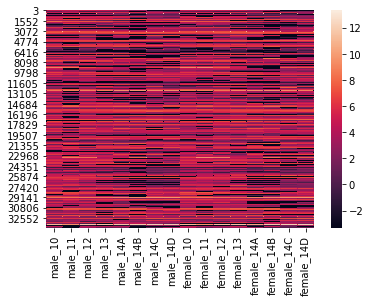

In [8]:
sns.heatmap(fpkm_transformed)

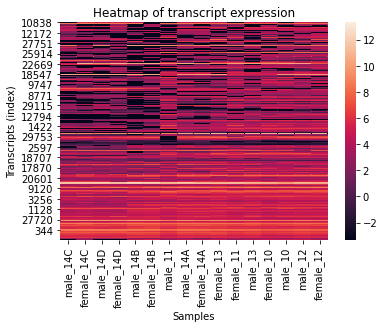

In [9]:
#specifically re-arrange the heatmap to look like clustermap (using results of linkage/leaves list)
#reorder the transformed dataframe, using linkage/leaves list, then make the heatmap
sample_indices =list(leaves_list(sample_linkage))
gene_indices = list(leaves_list(gene_linkage))

fpkm_transformed_reorg = fpkm_transformed.iloc[gene_indices, sample_indices]

fig,ax = plt.subplots()
ax = sns.heatmap(fpkm_transformed_reorg)
plt.xlabel("Samples")
plt.ylabel("Transcripts (index)")
plt.title("Heatmap of transcript expression")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

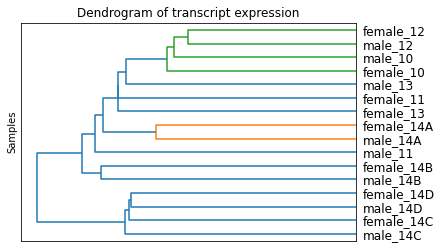

In [10]:
#create dendrogram of the samples in relation to one another
og_labels = np.array(list(fpkm_transformed.columns.values))
fig,ax = plt.subplots()
ax  = dendrogram(sample_linkage, orientation= 'left', labels = og_labels)
plt.ylabel("Samples")
plt.title("Dendrogram of transcript expression")
plt.savefig('dendrogram.png', bbox_inches='tight')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.show()

# Differential Expression Analysis

In [11]:
#add back transcript and gene names to the dataframe
fpkm_concat = pd.concat([fpkm_genes, fpkm_transformed], axis = 1)
fpkm_concat

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [12]:
#reformat dataframe such that each column is the transcript and rows are the samples
fpkm_formatted = fpkm_concat.T
#get rid of transcript name
fpkm_formatted.columns = fpkm_formatted.iloc[0]
fpkm_formatted = fpkm_formatted.iloc[2:,:]

#change FPKM values to be floats instead of objects
fpkm_formatted= fpkm_formatted.astype(float)
fpkm_formatted


t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,3.095164,...,1.140935,3.889324,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145


In [13]:
#separate the sex and stages from the sample IDs
samples = list(fpkm_formatted.index.values)

sexes = []
stages = []
for sample in samples:
    fields = sample.split('_')
    sex = fields[0]
    stage = fields[1]
    sexes.append(sex)

    if '14' in stage:
        stages.append(14)
    else:
        stages.append(int(stage))
        
#append the sexes and stages as separate columns to the formatted FPKM dataframe
fpkm_formatted['sex'] = sexes
fpkm_formatted['stage'] = stages
fpkm_formatted


t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,sex,stage
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063,male,10
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928,male,11
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877,male,12
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834,male,13
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735,male,14
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928,male,14
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194,male,14
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803,male,14
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950,female,10
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,3.095164,...,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145,female,11


In [14]:
#differential expression
#for ols, left side is the response variable while right side of equation is the predictor variable
#Use the stage number as a numeric independent variable (10, 11, 12, 13, 14)
transcripts = list(fpkm_formatted.columns.values)[:-2]
p_values = []
beta_values = []

for transcript in transcripts:
    formula_string = str(transcript) + " ~ stage"
    model = smf.ols(formula=formula_string, data=fpkm_formatted)
    results = model.fit()
    
    #convert p-value results from series -> numpy array ->list
    output_p = list(results.pvalues.to_numpy())
    p_values.append(float(output_p[1]))
    output_beta = list(results.params.to_numpy())
    beta_values.append(output_beta[1])
    


In [15]:
#create a differential expression dataframe containing p-values and beta values
diff_expr = pd.DataFrame(np.array(transcripts))
diff_expr.columns = ["transcripts"]
diff_expr['stage_pval'] = p_values
diff_expr['stage_betas'] = beta_values

diff_expr


,transcripts,stage_pval,stage_betas
0,FBtr0302347,0.735893,0.026464
1,FBtr0113885,0.162378,0.880440
2,FBtr0301810,0.263080,0.388746
3,FBtr0113895,0.031521,0.542177
4,FBtr0345179,0.221445,0.201195
...,...,...,...
8608,FBtr0100884,0.049018,0.820108
8609,FBtr0100886,0.051185,0.942403
8610,FBtr0100888,0.546605,0.231565
8611,FBtr0114261,0.170680,-0.212609


In [16]:
#create a separate dataframe for QQ plot with columns for underlying expected distribution (uniform)
QQ_dataframe = diff_expr.copy(deep=False)
QQ_dataframe['stage_log_pval'] = -1 * np.log10(QQ_dataframe['stage_pval'])
QQ_dataframe = QQ_dataframe.sort_values(by = "stage_pval")
QQ_dataframe['uniform_points'] = range(0, len(QQ_dataframe))
QQ_dataframe['uniform_pval'] = (QQ_dataframe['uniform_points'] + 1) / len(QQ_dataframe)
QQ_dataframe['uniform_logP'] = -1 * np.log10(QQ_dataframe['uniform_pval'])
QQ_dataframe

,transcripts,stage_pval,stage_betas,stage_log_pval,uniform_points,uniform_pval,uniform_logP
5153,FBtr0071924,8.260525e-15,2.183072,14.082992,0,0.000116,3.935154
5154,FBtr0330249,8.260525e-15,2.183072,14.082992,1,0.000232,3.634124
5152,FBtr0343014,1.454301e-14,2.150359,13.837346,2,0.000348,3.458033
7951,FBtr0080193,1.047712e-11,2.852146,10.979758,3,0.000464,3.333094
2209,FBtr0072872,2.536184e-11,1.740305,10.595819,4,0.000581,3.236184
...,...,...,...,...,...,...,...
5958,FBtr0071095,9.985308e-01,0.000630,0.000639,8608,0.999536,0.000202
5601,FBtr0345315,9.987745e-01,-0.000434,0.000533,8609,0.999652,0.000151
1060,FBtr0300247,9.991114e-01,0.000579,0.000386,8610,0.999768,0.000101
2518,FBtr0076886,9.995359e-01,-0.000065,0.000202,8611,0.999884,0.000050


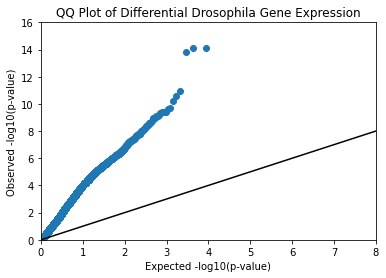

In [17]:
#Generate a QQ plot from the p-values.
fig, ax = plt.subplots()

ax.scatter(QQ_dataframe["uniform_logP"], QQ_dataframe["stage_log_pval"])
ax.plot([16,0], [16, 0], color = "black")
    
plt.title("QQ Plot of Differential Drosophila Gene Expression")
plt.xlim([0, 8])
plt.ylim([0, 16])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
plt.savefig('QQ_plot.png', bbox_inches='tight')
plt.show()

In [18]:
#perform differential expression, including sex as a covariate
p_values_covariate = []
beta_values_covariate = []
for transcript in transcripts:
    formula_string = str(transcript) + " ~ stage + sex"
    model = smf.ols(formula=formula_string, data=fpkm_formatted)
    results = model.fit()
    
    #convert p-value results from series -> numpy array ->list
    output_p = list(results.pvalues.to_numpy())
    output_beta = list(results.params.to_numpy())

    #stage p_value is the third in the list
    p_values_covariate.append(float(output_p[2]))
    beta_values_covariate.append(float(output_beta[2]))


In [19]:
diff_expr['stage_pval_sex_covariate'] = p_values_covariate
diff_expr['stage_beta_sex_covariate'] = beta_values_covariate
diff_expr

,transcripts,stage_pval,stage_betas,stage_pval_sex_covariate,stage_beta_sex_covariate
0,FBtr0302347,0.735893,0.026464,0.745479,0.026464
1,FBtr0113885,0.162378,0.880440,0.174987,0.880440
2,FBtr0301810,0.263080,0.388746,0.274123,0.388746
3,FBtr0113895,0.031521,0.542177,0.018751,0.542177
4,FBtr0345179,0.221445,0.201195,0.227350,0.201195
...,...,...,...,...,...
8608,FBtr0100884,0.049018,0.820108,0.056993,0.820108
8609,FBtr0100886,0.051185,0.942403,0.057250,0.942403
8610,FBtr0100888,0.546605,0.231565,0.560402,0.231565
8611,FBtr0114261,0.170680,-0.212609,0.177894,-0.212609


In [20]:
#apply the bonferroni correction to determine significant p-values/trancripts 
#use a 10% false discovery rrate
#set alpha to 0.10, divided by number of tests run
bonferroni = 0.10/len(diff_expr)
sig_stage = []
sig_stage_sex = []
stage_pval = diff_expr["stage_pval"]
stage_pval_sex_covar = diff_expr["stage_pval_sex_covariate"]
transcripts = diff_expr["transcripts"]

#generate lists of transcripts that fall under bonferroni corrected FDR
for index, p_value in stage_pval.items():
    if p_value <=bonferroni:
        sig_stage.append(transcripts[index])

for index, p_value in stage_pval_sex_covar.items():
    if p_value <=bonferroni:
        sig_stage_sex.append(transcripts[index])

print("number of significant transcripts: " + str(len(sig_stage)))
print("number of significant transcripts with sex as covariate: " + str(len(sig_stage_sex)))

common_transcripts = set.intersection(set(sig_stage), set(sig_stage_sex)) 


number of significant transcripts: 448
number of significant transcripts with sex as covariate: 346


In [21]:
#calculate percentage overlap of differentially expressed genes with and without sex as a covariate
percentage_overlap = len(common_transcripts)/len(sig_stage)*100
print("Percentage overlap: " + str(percentage_overlap) + '%')

#write results to a text file
f = open(output_file, 'w')
f.write("Percentage overlap: " + str(percentage_overlap) + '%' + '\n')
f.write('significant transcripts across stage \n')
f.write(str(sig_stage))
f.write('\n\n')
f.write('significant transcripts across stage and sex \n')
f.write(str(sig_stage_sex))
f.close()

Percentage overlap: 77.23214285714286%


In [22]:
diff_expr['stage_log_pval_sex_covariate'] = -1 * np.log10(diff_expr['stage_pval_sex_covariate'])

In [23]:
#dataframe of all insignificant SNPs with p-value > 10^-5 ie log(p-value) > 5
diff_expr_sig = diff_expr[diff_expr['stage_log_pval_sex_covariate']>5]
diff_expr_sig

,transcripts,stage_pval,stage_betas,stage_pval_sex_covariate,stage_beta_sex_covariate,stage_log_pval_sex_covariate
13,FBtr0078985,2.027653e-06,0.324045,4.087391e-06,0.324045,5.388554
14,FBtr0078967,1.196870e-06,0.219024,2.899826e-06,0.219024,5.537628
23,FBtr0078951,6.308141e-10,2.331668,2.578278e-09,2.331668,8.588670
34,FBtr0078921,8.124242e-08,-0.734910,2.369683e-07,-0.734910,6.625310
61,FBtr0078868,1.359935e-06,0.208828,3.302912e-06,0.208828,5.481103
...,...,...,...,...,...,...
8403,FBtr0301884,5.521030e-06,-2.244589,9.271600e-06,-2.244589,5.032845
8411,FBtr0273378,2.450227e-06,-1.638112,5.239267e-06,-1.638112,5.280729
8414,FBtr0330661,1.732566e-06,-1.327924,3.613478e-06,-1.327924,5.442075
8454,FBtr0081468,3.430108e-06,0.196649,7.828147e-06,0.196649,5.106341


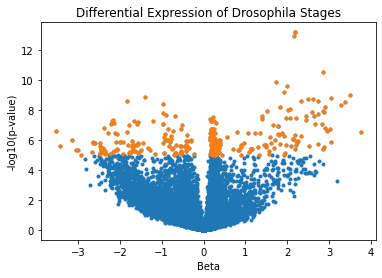

In [24]:
fig,ax = plt.subplots()
ax.scatter(diff_expr['stage_beta_sex_covariate'], diff_expr['stage_log_pval_sex_covariate'], marker = '.')
ax.scatter(diff_expr_sig['stage_beta_sex_covariate'], diff_expr_sig['stage_log_pval_sex_covariate'], marker = '.')
plt.xlabel("Beta")
plt.ylabel("-log10(p-value)")
plt.title("Differential Expression of Drosophila Stages")
plt.savefig('volcano_plot.png', bbox_inches='tight')
plt.show()